**Assignment: Compresive Strength Concrete Problem**

**Abstract:**

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.

**WORKFLOW :**
Load Data

Check Missing Values ( If Exist ; Fill each record with mean of its feature )

Standardized the Input Variables. Hint: Centeralized the data
Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)

Train the Model with Epochs (100) and validate it

If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

Evaluation Step

Prediction

**Load Data:**

[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [18]:
#import all required libraries 
import pandas as pd
import numpy as np
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [19]:
#to upload the Datset File that we use in training
data_set = pd.read_csv('C:/Users/asama/DL/Completed_Assignments/compresive_strength_concrete.csv')
data_set.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [20]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [21]:
data_set['Age (day)']=data_set.select_dtypes('int64').astype('float64')#converting age column to float64

In [22]:
test_val=(30/100)*len(data_set)#get the value that r 30% of Dataset
train_val=(50/100)*len(data_set)#get the value that r 50% of Dataset
val_val=(20/100)*len(data_set)#get the value that r 20% of Dataset

test_data=data_set.loc[len(data_set)-test_val: ,:'Age (day)']#separating the test data from dataset, pick the data from last of dataset
test_labels=data_set.loc[len(data_set)-test_val: ,'Concrete compressive strength(MPa, megapascals) ']#separating the test labels from dataset

remaining_data=data_set.loc[:len(data_set)-test_val,:'Age (day)']#to store the remaing datset for further processing
remaining_labels=data_set.loc[:len(data_set)-test_val,'Concrete compressive strength(MPa, megapascals) ']


In [23]:
mean=data_set.mean(axis=0)
std=data_set.std(axis=0)

remaining_data-=mean
remaining_data/=std

test_data-=mean
test_data/=std

In [24]:
train_data = remaining_data.loc[ :test_val]
train_labels = remaining_labels.loc[ :test_val]

val_data=remaining_data.loc[test_val:]
val_labels=remaining_labels.loc[test_val:]

In [25]:
model=models.Sequential()
model.add(layers.Dense(36,activation='relu',input_shape=(8,)))
model.add(layers.Dense(36,activation='relu'))
model.add(layers.Dense(1))


In [26]:
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])

In [27]:
model.fit(train_data,train_labels,epochs=150,batch_size=100,validation_data=(val_data,val_labels))

Epoch 1/150
4/4 [==============================] - 1s 105ms/step - loss: 2163.5584 - mae: 42.6828 - val_loss: 1376.6074 - val_mae: 33.1722
Epoch 2/150
4/4 [==============================] - 0s 26ms/step - loss: 2103.9069 - mae: 42.3746 - val_loss: 1357.7131 - val_mae: 32.9100
Epoch 3/150
4/4 [==============================] - 0s 27ms/step - loss: 1987.4253 - mae: 40.9026 - val_loss: 1340.3845 - val_mae: 32.6706
Epoch 4/150
4/4 [==============================] - 0s 28ms/step - loss: 2105.0069 - mae: 42.3026 - val_loss: 1323.9346 - val_mae: 32.4398
Epoch 5/150
4/4 [==============================] - 0s 28ms/step - loss: 2108.3102 - mae: 42.1202 - val_loss: 1306.9304 - val_mae: 32.2002
Epoch 6/150
4/4 [==============================] - 0s 27ms/step - loss: 1917.8337 - mae: 40.2239 - val_loss: 1288.0106 - val_mae: 31.9348
Epoch 7/150
4/4 [==============================] - 0s 26ms/step - loss: 1981.9710 - mae: 40.7203 - val_loss: 1271.0562 - val_mae: 31.6905
Epoch 8/150
4/4 [================

4/4 [==============================] - 0s 26ms/step - loss: 245.4213 - mae: 12.7737 - val_loss: 236.2832 - val_mae: 12.3608
Epoch 61/150
4/4 [==============================] - 0s 25ms/step - loss: 240.3474 - mae: 12.6356 - val_loss: 243.1909 - val_mae: 12.5285
Epoch 62/150
4/4 [==============================] - 0s 25ms/step - loss: 228.0730 - mae: 12.4403 - val_loss: 236.2840 - val_mae: 12.3767
Epoch 63/150
4/4 [==============================] - 0s 25ms/step - loss: 226.4680 - mae: 12.3294 - val_loss: 232.8842 - val_mae: 12.3016
Epoch 64/150
4/4 [==============================] - 0s 25ms/step - loss: 238.6244 - mae: 12.6311 - val_loss: 229.9725 - val_mae: 12.2329
Epoch 65/150
4/4 [==============================] - 0s 25ms/step - loss: 236.5423 - mae: 12.6398 - val_loss: 230.6755 - val_mae: 12.2569
Epoch 66/150
4/4 [==============================] - 0s 25ms/step - loss: 226.4251 - mae: 12.4368 - val_loss: 236.6154 - val_mae: 12.3958
Epoch 67/150
4/4 [==============================] - 0s

Epoch 120/150
4/4 [==============================] - 0s 61ms/step - loss: 149.2080 - mae: 10.1952 - val_loss: 229.5877 - val_mae: 12.2637
Epoch 121/150
4/4 [==============================] - 0s 27ms/step - loss: 144.3631 - mae: 9.8700 - val_loss: 230.2267 - val_mae: 12.2922
Epoch 122/150
4/4 [==============================] - 0s 25ms/step - loss: 153.7077 - mae: 10.1660 - val_loss: 227.8158 - val_mae: 12.2341
Epoch 123/150
4/4 [==============================] - 0s 26ms/step - loss: 147.1705 - mae: 10.0260 - val_loss: 231.0413 - val_mae: 12.2982
Epoch 124/150
4/4 [==============================] - 0s 27ms/step - loss: 146.6001 - mae: 9.9890 - val_loss: 228.4706 - val_mae: 12.2420
Epoch 125/150
4/4 [==============================] - 0s 27ms/step - loss: 146.0710 - mae: 9.9693 - val_loss: 231.1895 - val_mae: 12.3011
Epoch 126/150
4/4 [==============================] - 0s 27ms/step - loss: 146.0194 - mae: 9.9393 - val_loss: 230.5051 - val_mae: 12.2887
Epoch 127/150
4/4 [===================

In [31]:
def build_model():
    model=models.Sequential()
    model.add(layers.Dense(36,activation='relu',input_shape=(8,)))
    model.add(layers.Dense(36,activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model

In [32]:
k = 4
num_val_samples = len(remaining_data) // k
num_epochs = 80
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)

 # Prepare the validation data: data from partition # k
val_data = remaining_data[i * num_val_samples: (i + 1) * num_val_samples]
val_targets = remaining_labels[i * num_val_samples: (i + 1) * num_val_samples]


 # Prepare the training data: data from all other partitions
partial_train_data = np.concatenate([remaining_data[:i * num_val_samples],remaining_data[(i + 1) * num_val_samples:]],axis=0)
partial_train_targets = np.concatenate([remaining_labels[:i * num_val_samples],remaining_labels[(i + 1) * num_val_samples:]],axis=0)
 # Build the Keras model (already compiled)


model = build_model()
 # Train the model (in silent mode, verbose=0)
history = model.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets),epochs=num_epochs, batch_size=5)
mae_history = history.history['val_mae']
all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
Epoch 1/80
109/109 [==============================] - 1s 5ms/step - loss: 1927.7968 - mae: 40.1179 - val_loss: 452.1146 - val_mae: 18.0649
Epoch 2/80
109/109 [==============================] - 0s 3ms/step - loss: 1187.6651 - mae: 30.0898 - val_loss: 203.7810 - val_mae: 11.4247
Epoch 3/80
109/109 [==============================] - 0s 3ms/step - loss: 407.2570 - mae: 16.0988 - val_loss: 124.4217 - val_mae: 8.9456
Epoch 4/80
109/109 [==============================] - 0s 3ms/step - loss: 244.9751 - mae: 12.5886 - val_loss: 123.2444 - val_mae: 8.8041
Epoch 5/80
109/109 [==============================] - 0s 4ms/step - loss: 209.2611 - mae: 11.6421 - val_loss: 118.1569 - val_mae: 8.7297
Epoch 6/80
109/109 [==============================] - 0s 3ms/step - loss: 203.1999 - mae: 11.4197 - val_loss: 120.3804 - val_mae: 8.8277
Epoch 7/80
109/109 [==============================] - 0s 3ms/step - loss: 191.2908 - mae: 11.3

109/109 [==============================] - 0s 3ms/step - loss: 53.7811 - mae: 5.7812 - val_loss: 141.3625 - val_mae: 10.0704
Epoch 61/80
109/109 [==============================] - 0s 3ms/step - loss: 52.2434 - mae: 5.7253 - val_loss: 149.7916 - val_mae: 10.2560
Epoch 62/80
109/109 [==============================] - 0s 3ms/step - loss: 57.5550 - mae: 5.9014 - val_loss: 118.8510 - val_mae: 9.2467
Epoch 63/80
109/109 [==============================] - 0s 3ms/step - loss: 51.3502 - mae: 5.6918 - val_loss: 125.8490 - val_mae: 9.5062
Epoch 64/80
109/109 [==============================] - 0s 3ms/step - loss: 55.5904 - mae: 5.8940 - val_loss: 138.3837 - val_mae: 9.9284
Epoch 65/80
109/109 [==============================] - 0s 3ms/step - loss: 52.6162 - mae: 5.6148 - val_loss: 139.2025 - val_mae: 9.9999
Epoch 66/80
109/109 [==============================] - 0s 3ms/step - loss: 52.8416 - mae: 5.7163 - val_loss: 129.9518 - val_mae: 9.6834
Epoch 67/80
109/109 [==============================] - 0s 

In [34]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

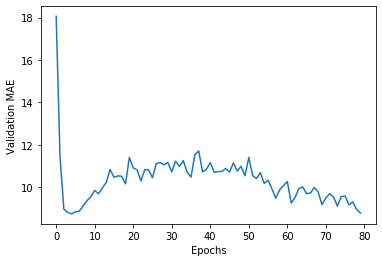

In [35]:
plt.plot(range(len(average_mae_history)), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


In [36]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)

10/10 [==============================] - 0s 3ms/step - loss: 111.1327 - mae: 8.5343


In [37]:
test_mae_score

8.534296989440918